<a href="https://colab.research.google.com/github/alako/makemore/blob/main/makemore_part2_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preliminaries

In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [4]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
len(words)

32033

In [6]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [7]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:

  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [8]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [9]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [10]:
C = torch.randn((27, 2))

In [11]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [12]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [13]:
emb.shape

torch.Size([228146, 3, 2])

In [14]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [15]:
h

tensor([[ 0.7976, -0.1309,  0.1312,  ..., -0.2481, -0.7898, -0.9452],
        [ 0.8648,  0.9178,  0.1283,  ..., -0.9000, -0.6513, -0.9766],
        [ 0.2887,  0.3066, -0.2396,  ..., -0.9063, -0.9004, -0.9997],
        ...,
        [-0.2754, -0.9999, -0.5927,  ...,  0.9995, -0.9708, -0.9879],
        [ 0.7311, -0.8647,  0.1038,  ...,  0.9957, -0.8737,  0.9671],
        [ 0.8780,  0.9998, -0.9965,  ...,  0.9948, -0.8227, -0.9921]])

In [16]:
h.shape

torch.Size([228146, 100])

In [17]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [18]:
logits = h @ W2 + b2

In [19]:
logits.shape

torch.Size([228146, 27])

In [20]:
counts = logits.exp()

In [21]:
prob = counts / counts.sum(1, keepdims=True)

In [22]:
prob.shape

torch.Size([228146, 27])

In [23]:
loss = -prob[torch.arange(228146), Y].log().mean()
loss

tensor(16.1430)

In [24]:
-torch.tensor(1/27).log()

tensor(3.2958)

In [25]:
# ------------ now made respectable :) ---------------

# Final code

In [26]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [27]:
Xtr[:3]

tensor([[ 0,  0,  0],
        [ 0,  0, 25],
        [ 0, 25, 21]])

In [86]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g) *0.15
b1 = torch.randn(200, generator=g)*0.01
W2 = torch.randn((200, 27), generator=g) *0.01
b2 = torch.randn(27, generator=g)*0
parameters = [C, W1, b1, W2, b2]
# C = torch.rand((27, 10)) * 0.01
# W1 = torch.rand((30, 100)) * 0.01
# b1 = torch.rand(100)* 0.01
# W2 = torch.rand((100, 27))* 0.01
# b2 = torch.rand(27)* 0.01
# parameters = [C, W1, b1, W2, b2]
for p in parameters:
  p.requires_grad = True

In [36]:
b2

tensor([-0., 0., -0., -0., 0., -0., -0., 0., 0., -0., -0., 0., 0., -0., -0., -0., -0., -0., 0., 0., 0., 0., 0., 0.,
        -0., 0., -0.])

In [37]:
sum(p.nelement() for p in parameters) # number of parameters in total

6097

In [32]:
lre = torch.linspace(0, -3, 200000)
lrs = 10**lre

In [89]:
lri = []
lossi = []
stepi = []

In [90]:
for i in range(200000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

  #print(loss.item())

tanh layer: mean +0.01, std 0.57, saturated: 1.80%


Text(0.5, 1.0, 'tanh distribution')

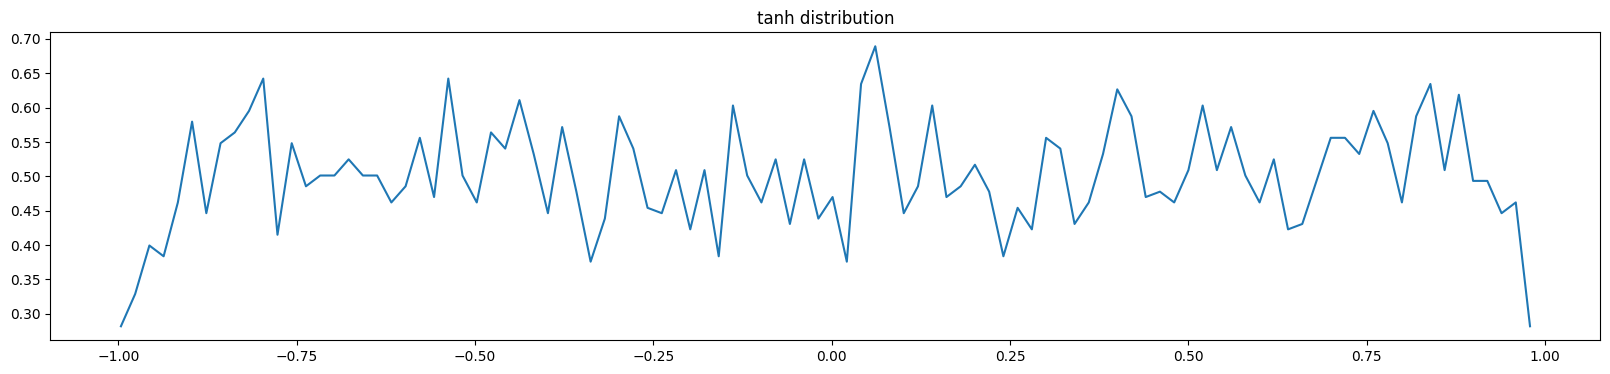

In [88]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
print('tanh layer: mean %+.2f, std %.2f, saturated: %.2f%%' % (h.mean(), h.std(), (h.abs() > 0.97).float().mean()*100))
hy, hx = torch.histogram(h, density=True)
plt.plot(hx[:-1].detach(), hy.detach())
plt.title('tanh distribution')

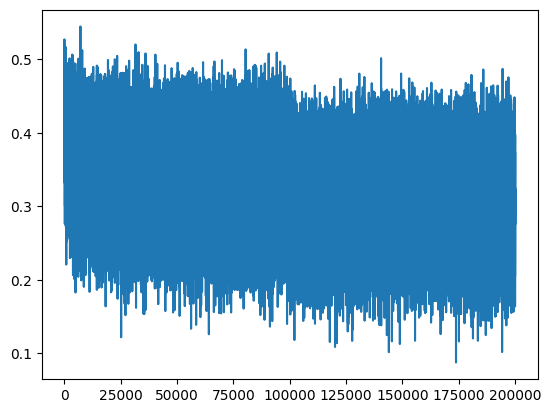

In [63]:
plt.plot(stepi, lossi)

In [64]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0689, grad_fn=<NllLossBackward0>)

In [65]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1300, grad_fn=<NllLossBackward0>)

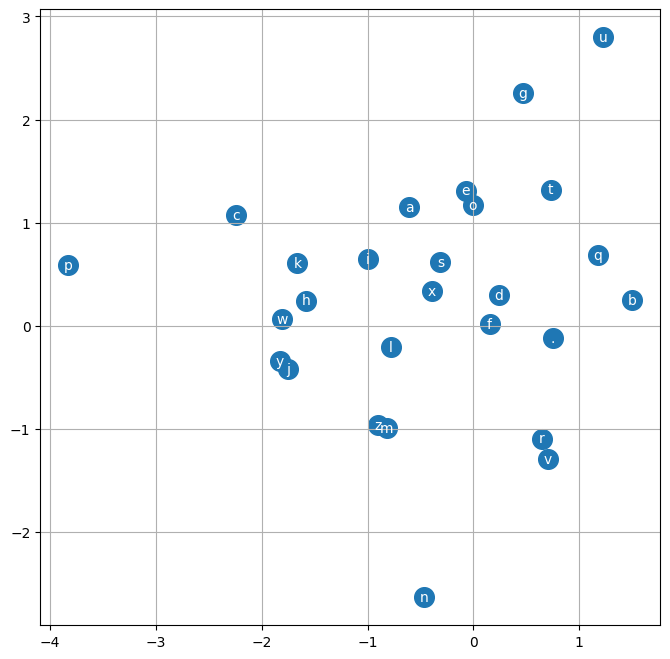

In [45]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [46]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [47]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [91]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mon.
almyah.
see.
medhayla.
remmadiendraege.
zered.
elin.
shi.
jen.
eden.
van.
naraelyn.
malaia.
noshub.
roshiriel.
kindreelynn.
novanni.
brence.
rhylene.
eha.
